# Abalone Data Set

Predict the age of abalone based on the count of number of rings on the shell 

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Storing the dataset location to a variable
link='https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv'

In [3]:
#Reading the data in csv format
df=pd.read_csv(link)

In [4]:
#Viewing the data
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
#Checking for number of rows and columns
df.shape

(4177, 9)

There are 4177 rows and 9 columns

In [6]:
#Checking for data types
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

All columns are in float except 
Sex - object 
Rings - int

In [7]:
#Encoding the column with object type
df['Sex'].unique()


array(['M', 'F', 'I'], dtype=object)

There are 3 classes in the above column, So we use label encoder to encode

In [8]:
#Let usw check for the count
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [9]:
df['Sex'].head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [10]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Sex'].head()

0    2
1    2
2    0
3    2
4    1
Name: Sex, dtype: int32

In [11]:
df['Sex'].dtypes

dtype('int32')

Checking for data type after encoding , we found it as int as expected 

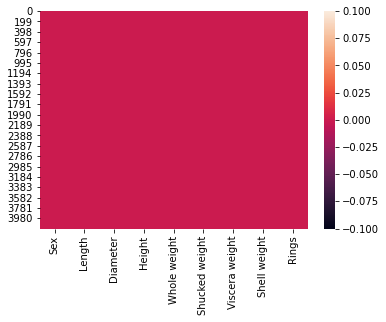

In [12]:
#Checking for missing values
sns.heatmap(df.isnull())

From graph we can see, no null/missing values in the dataset

In [13]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

No missing values in any column

In [14]:
df['Rings'].nunique()

28

There are 28 unique values in our target column

In [15]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

Above we can see the unique values and their count present in the data set

In [16]:
#Statistical summary of data
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [17]:
#We can see there are 0 in height column, it might be missed during entry, so we will replce it with mean or median
df['Height']=df['Height'].replace(0,df['Height'].mean())

In [18]:
#Checking for skewness
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.167124
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

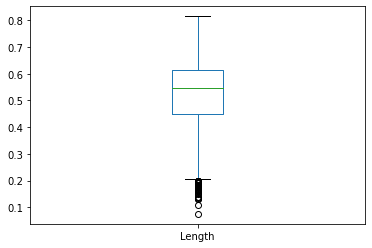

In [19]:
#Checking for outliers graphically
df['Length'].plot.box()

We can see there are outliers in this column in the range 0.1 to 0.2
Min: 0.2
Max: 0.8
25% under value : 0.45
50% under value : 0.55
75% under value : 0.60
IQR : 0.60-0.45 = 0.15

We can get all this info in statistical summary


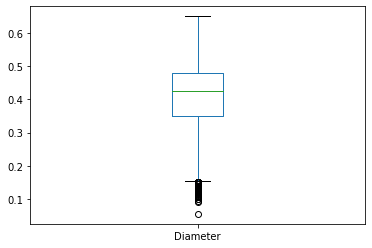

In [20]:
df['Diameter'].plot.box()

Outliers are present in this column also ranging from 0 to 0.15 nearly

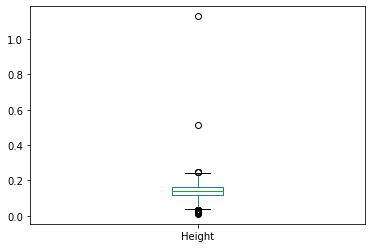

In [21]:
df['Height'].plot.box()

There  are outliers in this column also

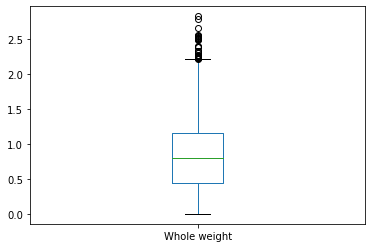

In [22]:
df['Whole weight'].plot.box()

Outliers are present in this column also

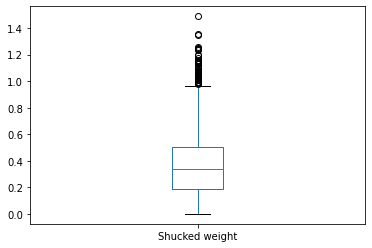

In [23]:
df['Shucked weight'].plot.box()

Outliers are present in this column also

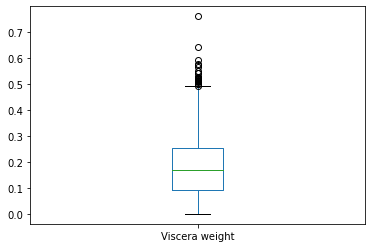

In [24]:
df['Viscera weight'].plot.box()

There are few outliers

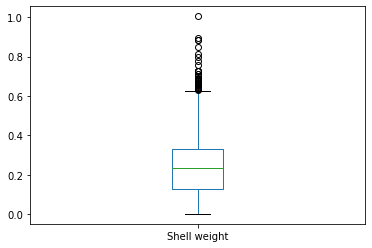

In [25]:
df['Shell weight'].plot.box()

There are outliers here also

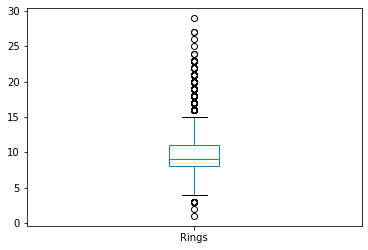

In [26]:
df['Rings'].plot.box()

Outliers are present

From above we observed that outliers are present in every column. We need to remove them first and check skewness again

In [27]:
#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

Now outliers removed

In [28]:
print('Shape before removing outliers: ',df.shape)
print('Shape after removing outliers: ',df_new.shape)

Shape before removing outliers:  (4177, 9)
Shape after removing outliers:  (4029, 9)


In [29]:
diff=df.shape[0]-df_new.shape[0]
perc=(diff/df.shape[0])*100
print('Number of rows removed: ',diff)
print('% loss of data:',perc)

Number of rows removed:  148
% loss of data: 3.5432128321762026


We can see 150 rows are removed i.e 3.6% of data is lost ... acceptable loss % 7 to 8. Therefore in range.

In [30]:
#Let us check for skewness after removing the outliers
df_new.skew()

Sex              -0.094816
Length           -0.621961
Diameter         -0.597677
Height           -0.244372
Whole weight      0.334719
Shucked weight    0.458771
Viscera weight    0.437599
Shell weight      0.349333
Rings             0.725901
dtype: float64

In [31]:
#Comparing skewness before and after removing outliers
skewness=pd.DataFrame({})
skewness['Before']=df.skew()
skewness['After']=df_new.skew()
skewness['Reduced']=df.skew()-df_new.skew()
skewness

,Before,After,Reduced
Sex,-0.098155,-0.094816,-0.003339
Length,-0.639873,-0.621961,-0.017912
Diameter,-0.609198,-0.597677,-0.011521
Height,3.167124,-0.244372,3.411496
Whole weight,0.530959,0.334719,0.196239
Shucked weight,0.719098,0.458771,0.260327
Viscera weight,0.591852,0.437599,0.154253
Shell weight,0.620927,0.349333,0.271594
Rings,1.114102,0.725901,0.388201


We can clearly see that skewness is reduced after removing outliers. 
We need to remove skewness in columns : Length, Diameter, Rings

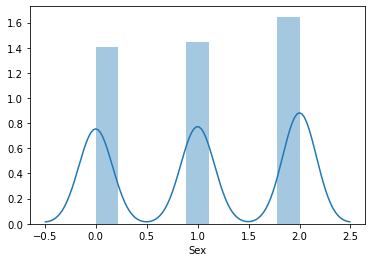

In [32]:
#Seeing the distribution for every column
sns.distplot(df['Sex'])

Observations: This is a categorical variable with classes 0,1 & 2 
    It is normally distributed over the each class.

skewness: -0.6219608151019027


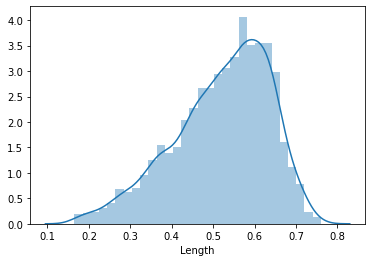

In [33]:
sns.distplot(df_new['Length'])
print('skewness:',df_new['Length'].skew())

It is skewed towards left i.e Negative skewness and not in acceptable range, so we should remove it

skewness : -0.6219608151019027
skewness after removing: -0.11867604547054801


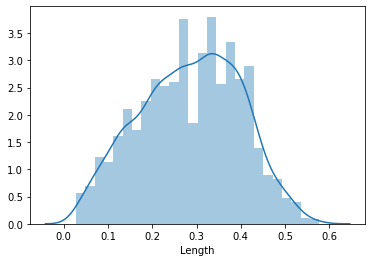

In [34]:
#Removing skewness using square, since it is -vely skewed
print('skewness :',df_new['Length'].skew())
df_new['Length']=np.square(df_new['Length'])
print('skewness after removing:',df_new['Length'].skew())
sns.distplot(df_new['Length'])

Skewness is reduced from -0.62 to -0.12 , now the skewness is in acceptable range.

Skewness: -0.5976768914733732


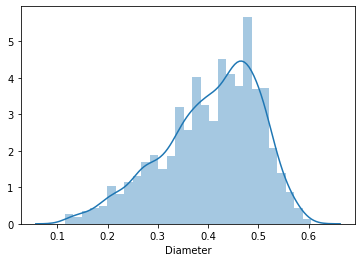

In [35]:
#Checking skewness for next column
sns.distplot(df_new['Diameter'])
print('Skewness:',df_new['Diameter'].skew())

Thereis left skewness i.e -vel skewed. Need to remove it. 

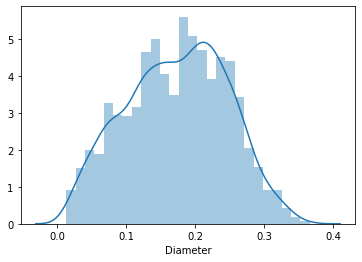

In [36]:
#Removing skewness
df_new['Diameter']=np.square(df_new['Diameter'])
sns.distplot(df_new['Diameter'])

In [37]:
df_new['Diameter'].skew()

-0.07826531577139419

Skewness is reduced from -0.59 to -0.07 , acceptable range.

In [38]:
#Checking skewness in next column - Rings which has skewness 
print('Skewness:',df_new['Rings'].skew())


Skewness: 0.7259013878162843


In [39]:
#Let us check correlation
df_new.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.044024,-0.047630,-0.046284,-0.034728,-0.016419,-0.045240,-0.043817,-0.033234
Length,-0.044024,1.000000,0.982031,0.886981,0.959676,0.935649,0.933270,0.933957,0.546256
Diameter,-0.047630,0.982031,1.000000,0.892766,0.958703,0.929287,0.928000,0.941969,0.564858
Height,-0.046284,0.886981,0.892766,1.000000,0.891447,0.842729,0.868949,0.899526,0.612363
Whole weight,-0.034728,0.959676,0.958703,0.891447,1.000000,0.971041,0.966635,0.960521,0.548561
Shucked weight,-0.016419,0.935649,0.929287,0.842729,0.971041,1.000000,0.930196,0.895583,0.440738
Viscera weight,-0.045240,0.933270,0.928000,0.868949,0.966635,0.930196,1.000000,0.918767,0.523194
Shell weight,-0.043817,0.933957,0.941969,0.899526,0.960521,0.895583,0.918767,1.000000,0.622413
Rings,-0.033234,0.546256,0.564858,0.612363,0.548561,0.440738,0.523194,0.622413,1.000000


We got correlation values here, to make this easy to understand let us visualise it

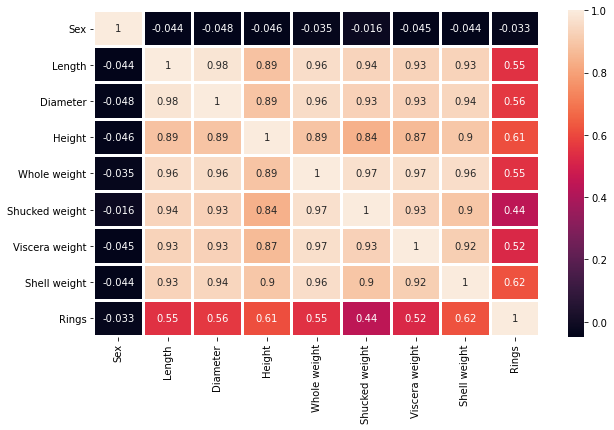

In [40]:
#Heatmap for correlation
plt.figure(figsize=(10,6))
sns.heatmap(df_new.corr(),annot=True,linewidth=2)

In [41]:
#Beore dropping let us check for multi colinearity also
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif['Variables']=x1.columns
    vif['vif Factor']=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return (vif)

In [43]:
calc_vif(df_new)

,Variables,vif Factor
0,Sex,2.537139
1,Length,225.231040
2,Diameter,220.988677
3,Height,55.556340
4,Whole weight,442.703051
5,Shucked weight,123.382496
6,Viscera weight,67.097047
7,Shell weight,95.108518
8,Rings,22.678605


We can see Length , Diameter,shucked weight and Whole Weight have high vif

Therefore by comparing vif and corr we can drop Length and Shucked weight since they have high vif and less corr with target 

In [44]:
#Dropping the columns
df_mod=df_new.drop(['Length','Shucked weight'],axis=1)

In [45]:
#Now checking the shape
print('Shape before corr :',df_new.shape)
print('Shape after removing columns with high corr:',df_mod.shape)

Shape before corr : (4029, 9)
Shape after removing columns with high corr: (4029, 7)


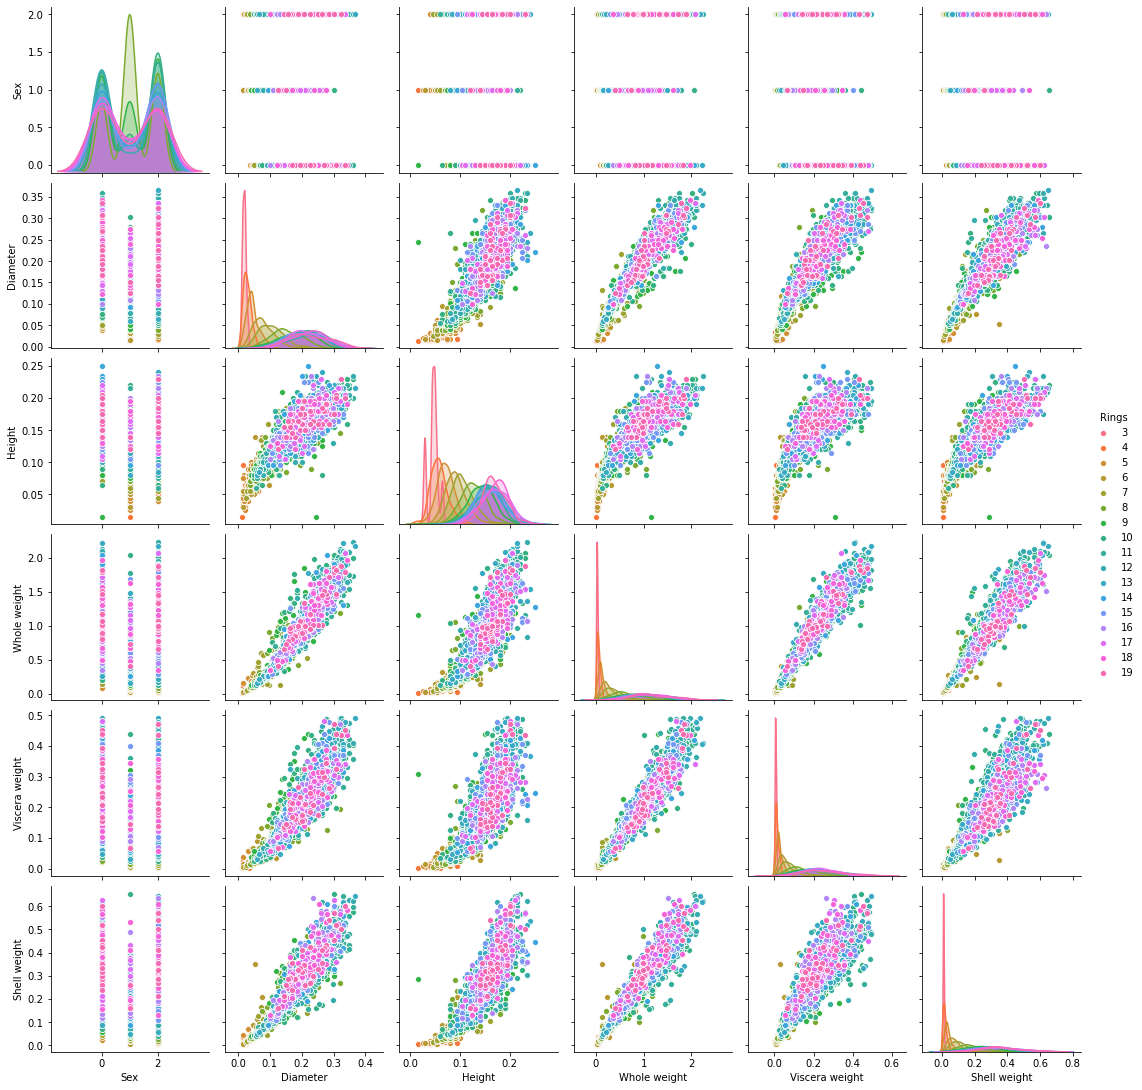

In [46]:
#Checking the relation b/w the variables
sns.pairplot(df_mod,hue='Rings')

In [47]:
#Splitting the data into x & y
x=df_mod.drop('Rings',axis=1)
y=df_mod['Rings']

We seperated the predictors and target variable

In [48]:
x.shape

(4029, 6)

Now x has 4027 rows and 6 columns

In [49]:
y.shape

(4029,)

Y has 4027 rows and 1 column

In [50]:
#Scaling the data 
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x=st.fit_transform(x)

In [51]:
#We consider this as regression model to predict the number of rings we can round the continuous value of output to integer and find the age
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [52]:
#Checking for best random_state
max_r2=0
rs=0
lr=LinearRegression()
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>max_r2:
        max_r2=r2
        rs=i
print('Best random state:',rs)
print('Max r2 score:',max_r2)
    

Best random state: 710
Max r2 score: 0.5031627827717742


We found best random state : 710

Now fixing this random state let us try with different models and find the best model

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=710)

In [54]:
#importing all the models
from sklearn.linear_model import SGDRegressor,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [55]:
#Making empty list and DataFrame to get metrics saved 
metrics=pd.DataFrame({})
msel=[]
r2l=[]

In [56]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),Ridge(),ElasticNet(),SGDRegressor()]

In [57]:
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    mse=mean_squared_error(y_test,pred)
    r2=r2_score(y_test,pred)
    msel.append(mse)
    r2l.append(r2)
    print(f'Mean squared error in {m} is:',mse)
    print(f'R2 score in {m} is:',r2)
    print('\n')

Mean squared error in LinearRegression() is: 4.266697863608032
R2 score in LinearRegression() is: 0.5031627827717742


Mean squared error in SVR() is: 4.1045326918062255
R2 score in SVR() is: 0.5220461664246336


Mean squared error in DecisionTreeRegressor() is: 8.124007936507937
R2 score in DecisionTreeRegressor() is: 0.05399687886467419


Mean squared error in Ridge() is: 4.2681842541414206
R2 score in Ridge() is: 0.502989699474121


Mean squared error in ElasticNet() is: 5.6586103276453725
R2 score in ElasticNet() is: 0.34108101898998167


Mean squared error in SGDRegressor() is: 4.265186755702281
R2 score in SGDRegressor() is: 0.5033387442930313




In [58]:
#Checking cross validation
cvl=[]
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold=KFold(5,shuffle=True)
for m in model:
    cv_score=cross_val_score(m,x,y,cv=kfold)
    cvl.append(cv_score.mean())
    print(f'cv score for {m} is:',cv_score.mean())
    print('\n')

cv score for LinearRegression() is: 0.44200288222967093


cv score for SVR() is: 0.47972649216907415


cv score for DecisionTreeRegressor() is: 0.04477763990377661


cv score for Ridge() is: 0.4417163094871331


cv score for ElasticNet() is: 0.32772420846604833


cv score for SGDRegressor() is: 0.4416306482043958




cv score is -ve for Decission Tree Regressor, which shouldn't be. The model is problem let us keep that model aside

In [59]:
diff=[]
for i in range(6):
    diff.append(r2l[i]-cvl[i])
diff

[0.06115990054210324,
 0.04231967425555949,
 0.009219238960897581,
 0.06127338998698789,
 0.013356810523933338,
 0.06170809608863548]

In [60]:
#Viewing the data frame with metrics to find the best model 
metrics['Model']=model
metrics['Mean Squared Error']=msel
metrics['R2 Score']=r2l
metrics['CV Score']=cvl
metrics['Difference']=diff

In [61]:
metrics

,Model,Mean Squared Error,R2 Score,CV Score,Difference
0,LinearRegression(),4.266698,0.503163,0.442003,0.061160
1,SVR(),4.104533,0.522046,0.479726,0.042320
2,DecisionTreeRegressor(),8.124008,0.053997,0.044778,0.009219
3,Ridge(),4.268184,0.502990,0.441716,0.061273
4,ElasticNet(),5.658610,0.341081,0.327724,0.013357
5,SGDRegressor(),4.265187,0.503339,0.441631,0.061708


There is least difference between R2 and CV scores for the model SVR. So consider that as best model 

#Hyper parameter tuning on the model SVR
from sklearn.model_selection import GridSearchCV
param={'kernel': ['rbf','linear', 'poly', 'sigmoid']}
grid=GridSearchCV(SVR(),param)
grid.fit(x_train,y_train,sample_weight=None)
print('Best Score:',grid.best_score_)
print('Best Estimator:',grid.best_estimator_)
print('Best Parameters:',grid.best_params_)
                                                                                                                                               

Decision tree has the least difference b/w r2 score and CV score. So it is our best model

In [62]:
#Tuning the decision tree model:
#Hyper parameter tuning on the model SVR
from sklearn.model_selection import GridSearchCV
param={'criterion':['squared_error', 'mse', 'friedman_mse', 'absolute_error', 'mae', 'poisson'],'splitter':['best','random'],
       'max_depth':[10,20,50],'min_samples_split':[1,5,10],'min_samples_leaf':[1,5,10,20],'random_state':[710]}
grid=GridSearchCV(DecisionTreeRegressor(),param)
grid.fit(x_train,y_train,sample_weight=None)
print('Best Score:',grid.best_score_)
print('Best Estimator:',grid.best_estimator_)
print('Best Parameters:',grid.best_params_)
                                                                                                                                               

Best Score: 0.4340125758784522
Best Estimator: DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=5,
                      random_state=710)
Best Parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 5, 'random_state': 710, 'splitter': 'best'}


In [70]:
mod=DecisionTreeRegressor(max_depth=10,min_samples_leaf=20,min_samples_split=5,random_state=710)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print('Score:',mod.score(x_train,y_train))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('R2 Score:',r2_score(y_test,pred))

Score: 0.5630446932039859
Mean Squared Error: 4.493566687244833
R2 Score: 0.4767449583523452


In [71]:
#Saving the model
import joblib
joblib.dump(mod,'4.Abalone_prediction.obj')

['4.Abalone_prediction.obj']